In [2]:
#  Ski Resort Statistics from Around the World

import pandas as pd

df = pd.read_excel ('skiResort.xlsx')

#  Print out the column head of the ski statistics data set
print (df.columns)

Index(['Resort Name', 'Continent', 'Country', 'State/Province', 'URL',
       'Altitude', 'Easy', 'Intermediate ', 'Difficult',
       'Aerial tramway/reversible ropeway', 'Circulating ropeway/gondola lift',
       'Chairlift', 'T-bar lift/platter/button lift ',
       'Rope tow/beginner lift', 'Sunkid Moving Carpet', 'Adult', 'Youth',
       'Child', 'Ski resort size ', 'Slope offering, variety of runs ',
       'Lifts and cable cars ', 'Snow reliability ', 'Slope preparation ',
       'Access, on-site parking ',
       'Orientation (trail map, information boards, sign-postings) ',
       'Cleanliness and hygiene ', 'Environmentally friendly ski operation ',
       'Friendliness of staff ', 'Mountain restaurants, ski huts, gastronomy ',
       'Après-ski ',
       'Accommodation offering directly at the slopes and lifts ',
       'Families and children ', 'Beginners ', 'Advanced skiers, freeriders ',
       'Snow parks ', 'Cross-country skiing and trails ',
       'Combined installati

In [3]:
#  We would like to focus on ski centers in the United States.  
#  First let's examine where the ski centers are located.  And 
#  see how many ski centers are in each country 

countries = df.groupby(['Country'])['Country'].count().sort_values(ascending=False)
print(countries.head(10))

Country
USA               289
Austria           208
Italy             169
Japan             162
France            162
Switzerland       151
Canada            108
Germany            98
Poland             58
Czech Republic     49
Name: Country, dtype: int64


In [4]:
#  We will filter out the other countries and focus on US ski centers
df_USA = df[df['Country']=='USA']

In [5]:
#  Let's examine which ski centers have chairlifts.  This is a dummy 
#  variable with the value of 0 when there is a chairlift.  
#  It appears that all the ski centers have chairlifts except 3.  

print('The minimum value is:', df_USA['Chairlift'].min())
print('The maximum value is:', df_USA['Chairlift'].max())
print('There are this many resorts with Chairlifts:',df_USA['Chairlift'].count())
print('There are this many records in the dataset:',len(df_USA))


#  Print out the ski centers without traditional lifts.  
#  These are mostly small ski centers.  If you like some hidden gems
#  maybe these are interesting.  But if you want modern technology
#  these 3 should be avoided.

print("\nHere are the ski centers without traditional lifts:\n")
print(df_USA[df_USA['Chairlift']!=0]['Resort Name'])


The minimum value is: 0.0
The maximum value is: 0.0
There are this many resorts with Chairlifts: 286
There are this many records in the dataset: 289

Here are the ski centers without traditional lifts:

126      bald-mountain
1054    moose-mountain
1093      mt-jefferson
Name: Resort Name, dtype: object


In [6]:
#  Examine the column of staff Friendliness
#  Unfortunately, only 20 ski centers have data on friendliness
#  Since the majority of the data is unpopulated, it is tough to use.

attr = 'Friendliness of staff '
print('The minimum value is:', df_USA[attr].min())
print('The maximum value is:', df_USA[attr].max())
print('There are this many:',df_USA[attr].count())
print('The total is:',len(df_USA))


The minimum value is: 4.0
The maximum value is: 5.0
There are this many: 20
The total is: 289


The mean altitude of the ski centers: 1579 meters


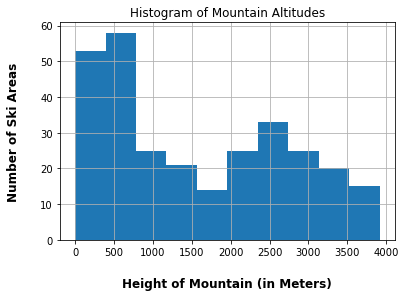

In [7]:
#  Let's examine the altitude of the ski centers
#  From the histogram we can see that the distribution is bimodal
#  A lot of Northeastern mountains are smaller and located at the right side 
#  of the histogram.  And the Western Rockies are on the left of the graph with
#  some mountains being very tall.  
#  Most ski centers are on mountains which are not that tall.  

#  This code creates a histogram of altitudes
alt = df_USA['Altitude'].hist(bins=10)
alt.set_xlabel("Height of Mountain (in Meters)", labelpad=20, weight='bold', size=12)
alt.set_ylabel("Number of Ski Areas", labelpad=20, weight='bold', size=12)
alt.set_title("Histogram of Mountain Altitudes")

#  This code calculates the average altitude in America
print("The mean altitude of the ski centers:", round(df_USA['Altitude'].mean()),"meters")


Here are the proportions of terrain difficulty across America:


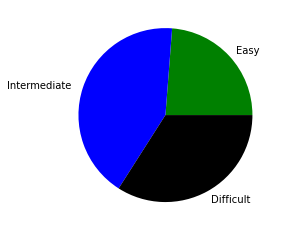

Here are the proportions of terrain difficulty at the biggest ski centers: 

             Resort Name  Easy  Intermediate   Difficult  Total_Slopes
1205           park-city  27.0          152.0       71.0         250.0
169       big-sky-resort  55.0           69.0      126.0         250.0
1517            snowmass  14.2          111.0      111.0         236.2
1702                vail  57.0           84.0       93.0         234.0
1568           steamboat  25.0           95.0       45.0         165.0
211         breckenridge  28.0           60.0       65.0         153.0
141         beaver-creek  28.5           64.5       57.0         150.0
1799  winter-park-resort  11.0           53.0       79.0         143.0
102      aspen-highlands  24.3           40.5       70.2         135.0
749             keystone  25.0           65.0       45.0         135.0


In [59]:
#  Let's examine the difficulty level of the ski centers.  There are three columns
#  which give the number of easy, intermediate and difficult trails. 
#  The code adds a fourth column for the total number of trails. 
#  We generate a pie graph for the overall percentages from all the ski centers.

#  Finally we sort by the ski centers with the most trails.  The biggest ones.
#  And give the breakdown of difficulty of the top 10 biggest resorts. 

# this import is needed to generate a pie-chart from a list
import matplotlib.pyplot as plt
df_USA2 = df_USA.copy()

#  create a total column and make a copy of the dataframe
sum_col = df_USA['Easy']+df_USA['Intermediate ']+df_USA['Difficult']
df_USA2['Total_Slopes'] = sum_col

#  create a variable with the column names
attr = ['Resort Name','Easy', 'Intermediate ', 'Difficult','Total_Slopes']

#  create the pie chart of overall difficulty aggregated across the country.
print("Here are the proportions of terrain difficulty across America:")
terrain = list(df_USA.loc[:,(attr[1:4])].sum())/df_USA.loc[:,(attr[-1])].sum()
terrain_plot = plt.pie(terrain, labels=attr[1:4],colors = ["green","blue","black"])
plt.show()

#  create a table of the breakdown of difficulty of the biggest ski centers
print("Here are the proportions of terrain difficulty at the biggest ski centers:","\n")
df_slopes = df_USA2[attr].sort_values('Total_Slopes',ascending=False)
df_slopes = df_slopes
print(df_slopes.head(10))


The resorts with the best lifts are the following: 

                      Resort Name  Lifts and cable cars 
1816             yellowstone-club                    4.3
1147  northstar-california-resort                    4.1
219                      brighton                    4.1
1759           wachusett-mountain                    4.1
1649                   terry-peak                    4.1
1661                   timberline                    4.1
1581                        stowe                    4.0
141                  beaver-creek                    4.0
954              mammoth-mountain                    4.0
1555                 squaw-valley                    4.0 

The minimum value is: 1.0
The maximum value is: 4.3
Percentage Filled: 100.0  Percent

The quality of the lifts in the US:


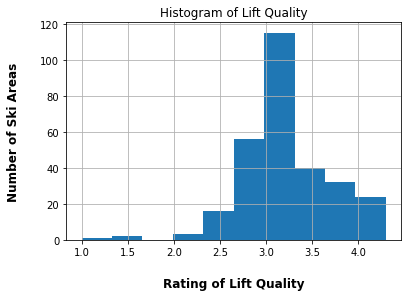

In [88]:
#  Here we examine the quality of lifts across the ski areas.
#  From the histogram we created it is easy to see that most ski centers
#  have adequate lift capicity.  But there are a few with outstanding service.
#  A just a couple which are worth avoiding.

#  Here is a variable with the two columns of interest
attr = ['Resort Name','Lifts and cable cars ']

#  The following code creates the histogram of lift quality
alt = df_USA[attr[1]].hist(bins=10)
alt.set_xlabel("Rating of Lift Quality", labelpad=20, weight='bold', size=12)
alt.set_ylabel("Number of Ski Areas", labelpad=20, weight='bold', size=12)
alt.set_title("Histogram of Lift Quality")

#  Sort the ski centers by lift quality
df_lifts = df_USA[attr].sort_values(attr[1], ascending=False).copy()

#  Display a table of ski centers with the best lifts
print("The resorts with the best lifts are the following:",'\n')
print(df_lifts.head(10),'\n')

#  Here are some descriptive statistics about the column of data
print('The minimum value is:', df_USA[attr[1]].min())
print('The maximum value is:', df_USA[attr[1]].max())
print('Percentage Filled:',100*df_USA[attr[1]].count()/len(df_USA)," Percent")
print("\nThe quality of the lifts in the US:")



           Resort Name  Slope offering, variety of runs 
78      arapahoe-basin                               5.0
1517          snowmass                               5.0
1555      squaw-valley                               5.0
1568         steamboat                               5.0
1581             stowe                               5.0
169     big-sky-resort                               5.0
1205         park-city                               5.0
211       breckenridge                               5.0
102    aspen-highlands                               5.0
954   mammoth-mountain                               5.0 

The minimum value is: 1.0
The maximum value is: 5.0
Percentage Filled: 100.0  Percent


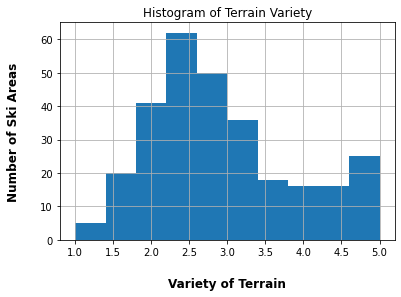

In [104]:
# We examine Variety of Terrain
# From the histogram it is clear that there are quite a number of ski centers with excellant
# Terrain Variety.  We print a histogram and then print out a table with the best ski centers
# for Terrain Variety.  

attr = ['Resort Name','Slope offering, variety of runs ']
print(df_USA[attr].sort_values('Slope offering, variety of runs ',ascending=False).head(10),'\n')

#  The following code creates the histogram of terrain variety
alt = df_USA[attr[1]].hist(bins=10)
alt.set_xlabel("Variety of Terrain", labelpad=20, weight='bold', size=12)
alt.set_ylabel("Number of Ski Areas", labelpad=20, weight='bold', size=12)
alt.set_title("Histogram of Terrain Variety")


print('The minimum value is:',df_USA[attr[1]].min())
print('The maximum value is:', df_USA[attr[1]].max())
print('Percentage Filled:',100*df_USA[attr[1]].count()/len(df_USA)," Percent")


          Resort Name  Ski resort size 
1517         snowmass               5.0
1702             vail               5.0
169    big-sky-resort               4.9
1205        park-city               4.8
1568        steamboat               4.8
1277  powder-mountain               4.5
693      jackson-hole               4.4
753        killington               4.4
331   copper-mountain               4.4
342     crested-butte               4.3

Min: 1.1
Max: 5.0
Percentage Filled: 100.0  Percent


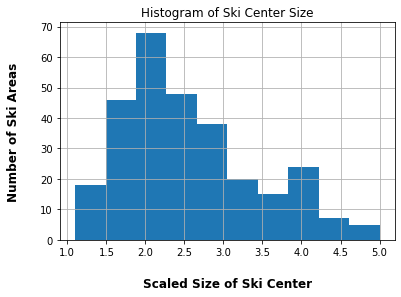

In [10]:
#  We examine the ski resort size
#  From the histogram of size, it is clear that there are just a few mega-resorts
#  While almost everything else is quite modest in size.

#  Here is a variable with the two columns of interest
attr = ['Resort Name','Ski resort size ']

#  Here is a table of ski resorts sorted by size.  The 10 biggest resorts are listed.
print(df_USA[attr].sort_values('Ski resort size ',ascending=False).head(10))


#  The following code creates the histogram of size of ski resorts
alt = df_USA[attr[1]].hist(bins=10)
alt.set_xlabel("Scaled Size of Ski Center", labelpad=20, weight='bold', size=12)
alt.set_ylabel("Number of Ski Areas", labelpad=20, weight='bold', size=12)
alt.set_title("Histogram of Ski Center Size")

#  Here are some descriptive statistics from the column.
print('\nMin:',df_USA[attr[1]].min())
print('Max:', df_USA[attr[1]].max())
print('Percentage Filled:',100*df_USA[attr[1]].count()/len(df_USA)," Percent")

